In [2]:
import pandas as pd

In [3]:
messages_df = pd.read_csv('spam.csv', encoding='latin-1')

In [4]:
messages_df.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [5]:
messages_df.shape

(10743, 5)

In [6]:
messages_df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [7]:
messages_df.head(3)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [8]:
messages_df.rename(columns={"v1":"Level", "v2":"Message"}, inplace=True)

In [9]:
messages_df.head(3)

,Level,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [10]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder_level = LabelEncoder()

In [11]:
messages_df['Level'] = LabelEncoder_level.fit_transform(messages_df['Level'])

In [12]:
messages_df.head(3)

,Level,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


## Checking Missing Values

In [13]:
messages_df.isnull().sum()

Level      0
Message    0
dtype: int64

## Check Duplicate Values

In [14]:
messages_df.duplicated().sum()

581

In [15]:
messages_df.duplicated().sum()

581

In [16]:
messages_df.drop_duplicates(keep='first', inplace=True)

In [17]:
messages_df.duplicated().sum()

0

In [18]:
messages_df['Level'].value_counts()

Level
0    8047
1    2115
Name: count, dtype: int64

In [19]:
import matplotlib.pyplot as plt

## Exploratory Data Analysis

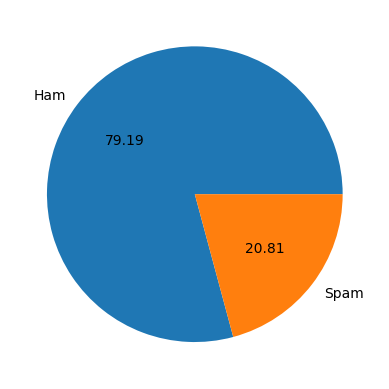

In [20]:
plt.pie(messages_df['Level'].value_counts(), labels=['Ham', 'Spam'], autopct='%0.2f')
plt.show()

In [21]:
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mostafiz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
messages_df['Characters'] = messages_df['Message'].apply(len)

In [24]:
messages_df.head(2)

,Level,Message,Characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29


In [25]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

# Ensure NLTK dependencies are downloaded
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mostafiz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Mostafiz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [26]:
messages_df['Message'] = messages_df['Message'].fillna('').astype(str)

In [27]:
# Count the number of sentences in each message
messages_df['num_sentences'] = messages_df['Message'].apply(lambda x: len(sent_tokenize(x)))

In [28]:
messages_df.head(2)

,Level,Message,Characters,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,2
1,0,Ok lar... Joking wif u oni...,29,2


In [29]:
messages_df['num_words'] = messages_df['Message'].apply(lambda x: len(word_tokenize(x)))

In [30]:
messages_df.head(2)

,Level,Message,Characters,num_sentences,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24
1,0,Ok lar... Joking wif u oni...,29,2,8


In [31]:
import seaborn as sns

In [32]:
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [33]:
def Transform_message(message):
    message = message.lower()
    message = nltk.word_tokenize(message)
    
    y = []
    for i in message:
        if i.isalnum():
            y.append(i)

    message = y[:] #Copying values of variable y to variable message
    y.clear() #remove all items


    for i in message:
        y.append(ps.stem(i))

    return ' '.join(y)



In [34]:
Transform_message(" My NAME iS MostafiZ")

'my name is mostafiz'

In [35]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mostafiz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
messages_df['Transformed_Message'] = messages_df['Message'].apply(Transform_message)

In [37]:
messages_df.head(3)

,Level,Message,Characters,num_sentences,num_words,Transformed_Message
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,29,2,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37,free entri in 2 a wkli comp to win fa cup fina...


In [38]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height = 500, min_font_size=10, background_color='yellow')

In [39]:
spam_wc = wc.generate(messages_df[messages_df['Level']==1]['Transformed_Message'].str.cat(sep = ' '))

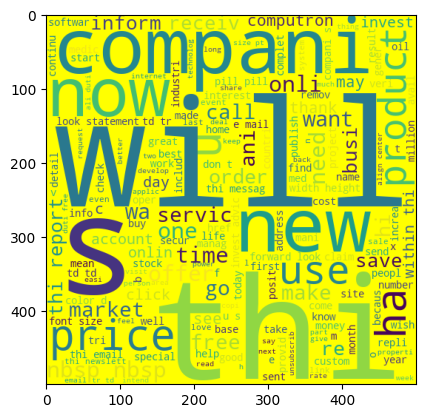

In [40]:
plt.imshow(spam_wc)

In [41]:
ham_wc = wc.generate(messages_df[messages_df['Level']==0]['Transformed_Message'].str.cat(sep = ' '))

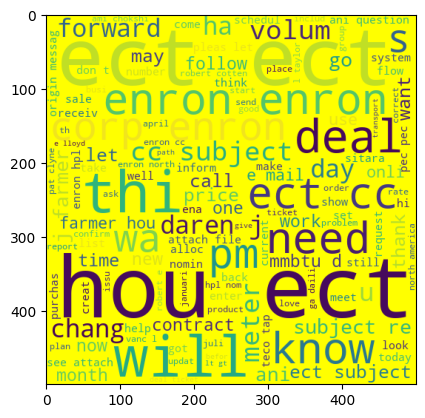

In [42]:
plt.imshow(ham_wc)

## Top 50 words

In [43]:
spam_corpus = []

for message in messages_df[messages_df['Level'] == 1]['Transformed_Message']:
    for word in message.lower().split():
        spam_corpus.append(word)


In [44]:
len(spam_corpus)

290896

In [45]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(50))

,0,1
0,the,7415
1,to,5733
2,and,4995
3,of,4564
4,a,4101
5,in,3187
6,you,3041
7,for,2698
8,is,2392
9,thi,2364


In [46]:
ham_corpus = []

for message in messages_df[messages_df['Level'] == 0]['Transformed_Message']:
    for word in message.lower().split():
        ham_corpus.append(word)

In [47]:
pd.DataFrame(Counter(ham_corpus).most_common(50))

,0,1
0,the,18948
1,to,16319
2,ect,13690
3,and,8595
4,for,8266
5,i,7779
6,hou,7174
7,you,7137
8,a,6854
9,enron,6442


## Model Building

In [48]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [49]:
X = tfidf.fit_transform(messages_df['Transformed_Message']).toarray()

In [50]:
y = messages_df['Level'].values

## Train Test Split

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [53]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [54]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [55]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)

print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.9163797343826857
[[1489   99]
 [  71  374]]
0.7906976744186046


In [56]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.867683226758485
[[1588    0]
 [ 269  176]]
1.0


In [57]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.8647319232661091
[[1550   38]
 [ 237  208]]
0.8455284552845529


In [58]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))